In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


![](https://images.unsplash.com/photo-1568605117036-5fe5e7bab0b7?crop=entropy&cs=tinysrgb&fm=jpg&ixlib=rb-1.2.1&q=80&raw_url=true&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170)

 <h1 style="background-color:#99ccff
;font-family:newtimeroman;font-size:225%;text-align:center;border-radius: 15px 50px;">  UK Used Cars EDA , Analyse , Visualization , modeling 🚗</h1><a id=0></a>
 
 ### Our work flow is :

 #  [1.  Car EDA and Analysis](#1)
 
   [1.1 Importing the data:](#1.1)
   
   [1.2 Descipe the data:](#1.2)
   
   [1.3 Exploratory Data Analysis:](#1.3)
   
   [1.4  statistical summary:](#1.4)
   
   [1.5  data preparation and cleaning :](#1.5)
   
   
   
 #  [2. Exploration for the data and Visualization ](#2)
 
   [2.1 Checking what is the most popular company:](#2.1)
   
   [2.2 Checking most popular model for each car copmany :](#2.2)
   
   [2.3 Checking which transmission is more popular](#2.3)
   
   [2.4 Checking which fuel type is more popular](#2.4)
  
   [2.5 Checking carbody is more popula](#2.5)
   
   [2.6 Checking relation between varaibles](#2.6)
   
   [2.7 Checking Variable Distribution](#2.7)
   
   [2.8 Summary of the analyse](#2.8)

### ****import necessary libraries****

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import sklearn 
import warnings
warnings.filterwarnings('ignore')



### import Dataset  

In [3]:
file = pd.read_csv("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")
df=file.copy()

In [4]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 5.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### **load the description of the variables**

In [5]:

descrip = pd.read_excel("/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx")
descrip = descrip.iloc[:, [7,11]]
descrip = descrip.dropna()
descrip = descrip.rename(columns={'Unnamed: 7': "Features", "Unnamed: 11": 'Definition'})
descrip.T

,3,4,5,6,7,8,9,10,11,12,...,19,20,21,22,23,24,25,26,27,28
Features,Car_ID,Symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price(Dependent variable)
Definition,Unique id of each observation (Interger),"Its assigned insurance risk rating, A value of...",Name of car company (Categorical),Car fuel type i.e gas or diesel (Categorical),Aspiration used in a car (Categorical),Number of doors in a car (Categorical),body of car (Categorical),type of drive wheel (Categorical),Location of car engine (Categorical),Weelbase of car (Numeric),...,Size of car (Numeric),Fuel system of car (Categorical),Boreratio of car (Numeric),Stroke or volume inside the engine (Numeric),compression ratio of car (Numeric),Horsepower (Numeric),car peak rpm (Numeric),Mileage in city (Numeric),Mileage on highway (Numeric),Price of car (Numeric)


### **Exploratory Data Analysis**

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


### **spliting the carname column to company and model columns and make it easy to deal with**

In [8]:
df[['company','model']] = df.CarName.str.split(" ",n=1,expand=True)

### **Droping the old column**

In [9]:
df.drop(["CarName"],axis=1,inplace=True)

In [10]:
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,model
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


### **Moveing the new columns to the i-th (0,1) in the dataframe**

In [11]:
first_column = df.pop('company')
df.insert(0, 'company', first_column)
second_column = df.pop('model')
df.insert(1, 'model', second_column)

In [12]:
df

,company,model,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,giulia,1,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,stelvio,2,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,Quadrifoglio,3,1,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,100 ls,4,2,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,100ls,5,2,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,145e (sw),201,-1,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo,144ea,202,-1,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo,244dl,203,-1,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo,246,204,-1,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### **Correcting of car names**

In [13]:
df["company"]=df["company"].str.lower()

def change(a,b):
    df['company'].replace(a,b,inplace=True)
    
change('maxda','mazda')
change('porcshce','porsche')
change('toyouta','toyota')
change('vokswagen','volkswagen')
change('vw','volkswagen')
df["company"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

###  **check correlation between variables**

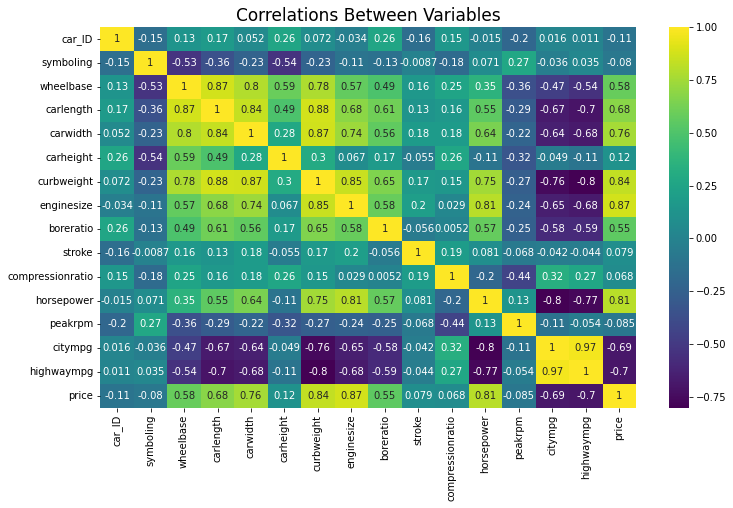

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title("Correlations Between Variables", size=17)
plt.show()

In [15]:
df.columns

Index(['company', 'model', 'car_ID', 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### **Drop unuseful variable that not affect on the target variable**

In [16]:
df.drop(['peakrpm', 'citympg', 'highwaympg','boreratio','car_ID', 'symboling','compressionratio','stroke','curbweight'],axis=1,inplace=True)

In [17]:
df.columns

Index(['company', 'model', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'horsepower', 'price'],
      dtype='object')

### **Checking the outliers for numerical variables**

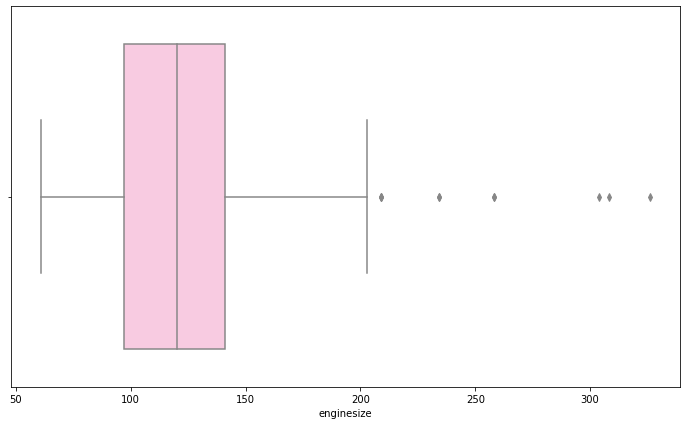

In [18]:
plt.figure(figsize=(12,7))
sns.boxplot(df['enginesize'],color="#FFC4E1")
plt.show()

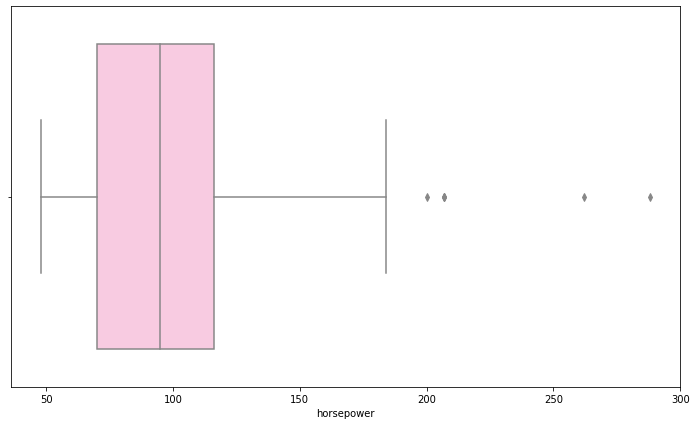

In [19]:
plt.figure(figsize=(12,7))
sns.boxplot(df['horsepower'],color="#FFC4E1")
plt.show()

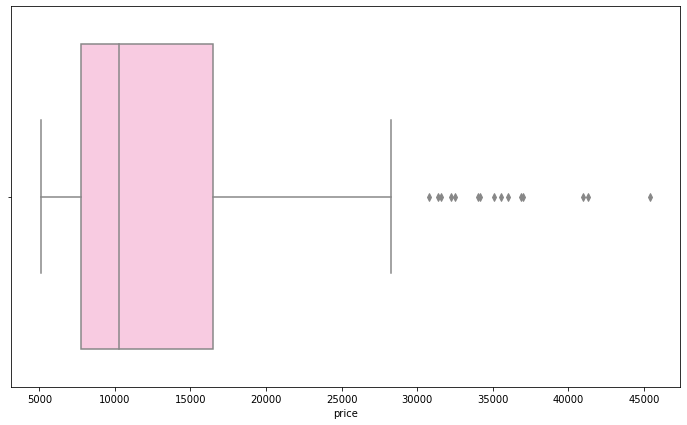

In [20]:
plt.figure(figsize=(12,7))
sns.boxplot(df['price'],color="#FFC4E1")
plt.show()

## Summaries :
#### **as we can see here we found outliers but we can not delet it**
#### **becouse it unique attributes for unique cars and deleting it will affect on model performance**


In [21]:

pie=df["company"].value_counts().reset_index()
pie.columns=["company","count"]
pie.T

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
company,toyota,nissan,mazda,mitsubishi,honda,volkswagen,subaru,peugeot,volvo,dodge,...,audi,plymouth,saab,porsche,isuzu,jaguar,chevrolet,alfa-romero,renault,mercury
count,32,18,17,13,13,12,12,11,11,9,...,7,7,6,5,4,3,3,3,2,1


### **Check the most popular model**


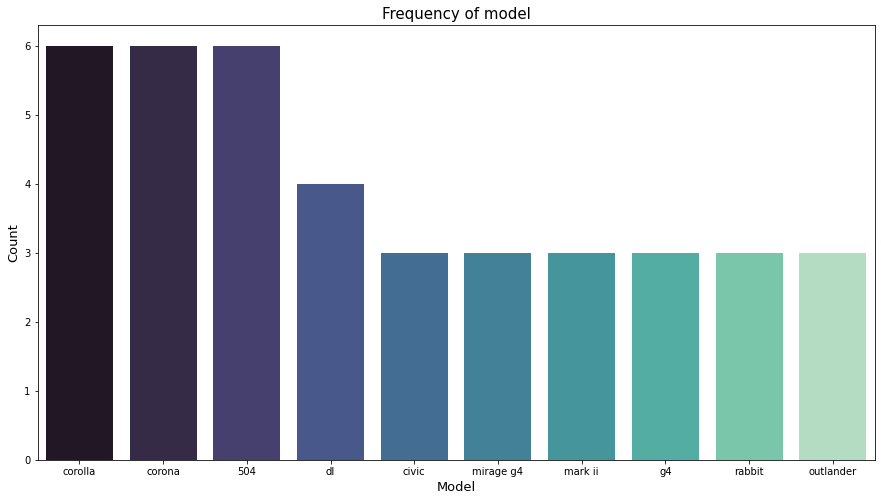

In [22]:
model=df["model"].value_counts().reset_index()
model.columns=["model","count"]
plt.figure(figsize=(15,8))
count_of_model = df['model'].value_counts()[0:10].sort_values(ascending=False)
sns.countplot(data=df, x='model',order=count_of_model.index,palette="mako")
plt.title('Frequency of model',size=15)
plt.xlabel('Model',size=13)
plt.ylabel('Count',size=13)
plt.show()


In [23]:
brand_count=df
px.treemap(brand_count,path=["company"],title=" The most bought car brand :")

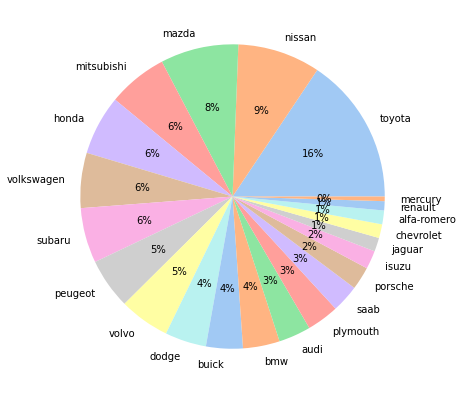

In [24]:
plt.figure(figsize=(12,7))
color=sns.color_palette("pastel")
plt.pie(pie["count"],colors=color,autopct='%.0f%%',labels=pie["company"])
plt.show()

## Summaries :
### as we can here the most popular car company is toyota

### **Check the most popular company**

In [25]:
model=df["model"].value_counts().reset_index()
model.columns=["model","count"]
model

,model,count
0,corolla,6
1,corona,6
2,504,6
3,dl,4
4,civic,3
...,...,...
136,rx2 coupe,1
137,rx3,1
138,xk,1
139,xf,1


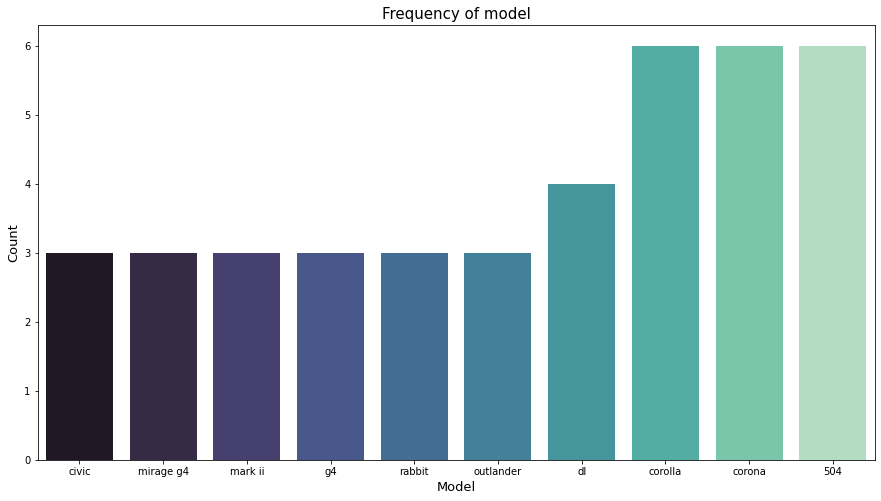

In [26]:
plt.figure(figsize=(15,8))
count_of_model = df['model'].value_counts()[0:10].sort_values()
sns.countplot(data=df, x='model',order=count_of_model.index,palette="mako")
plt.title('Frequency of model',size=15)
plt.xlabel('Model',size=13)
plt.ylabel('Count',size=13)
plt.show()

## Summaries :
### **the most common models is corollar , corona , 504**

### **check the most common fueltype**

In [27]:
fueltype=df['fueltype'].value_counts().reset_index()
fueltype.columns=["fueltype","count"]
fueltype

,fueltype,count
0,gas,185
1,diesel,20


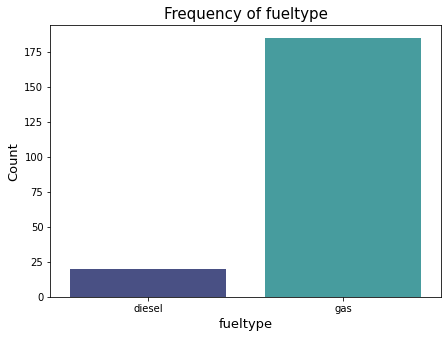

In [28]:
plt.figure(figsize=(7,5))
count_of_model = df['fueltype'].value_counts()[0:10].sort_values()
sns.countplot(data=df, x='fueltype',order=count_of_model.index,palette="mako")
plt.title('Frequency of fueltype',size=15)
plt.xlabel('fueltype',size=13)
plt.ylabel('Count',size=13)
plt.show()


## **Summaries :**

### **check the most common drive wheel system**

In [29]:
drivewheel=df['drivewheel'].value_counts().reset_index()
drivewheel.columns=['drivewheel',"count"]
drivewheel

,drivewheel,count
0,fwd,120
1,rwd,76
2,4wd,9


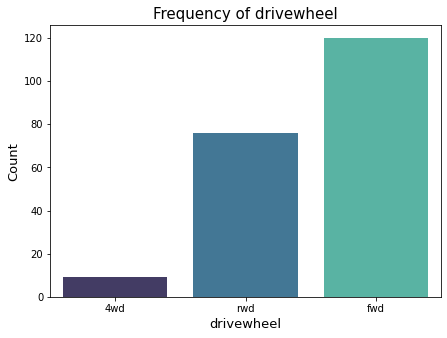

In [30]:
plt.figure(figsize=(7,5))
drivewheel = df['drivewheel'].value_counts()[0:10].sort_values()
sns.countplot(data=df, x='drivewheel',order=drivewheel.index,palette="mako")
plt.title('Frequency of drivewheel',size=15)
plt.xlabel('drivewheel',size=13)
plt.ylabel('Count',size=13)
plt.show()


## **Summaries :**

### **check the most common car body**

In [31]:
carbody=df['carbody'].value_counts().reset_index()
carbody.columns=['carbody',"count"]
carbody

,carbody,count
0,sedan,96
1,hatchback,70
2,wagon,25
3,hardtop,8
4,convertible,6


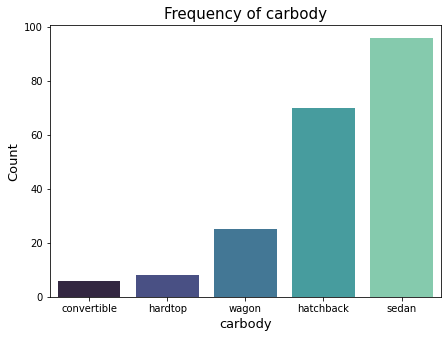

In [32]:
plt.figure(figsize=(7,5))
drivewheel = df['carbody'].value_counts()[0:10].sort_values()
sns.countplot(data=df, x='carbody',order=drivewheel.index,palette="mako")
plt.title('Frequency of carbody',size=15)
plt.xlabel('carbody',size=13)
plt.ylabel('Count',size=13)
plt.show()

### check if the fual type affect on the price for every car company 

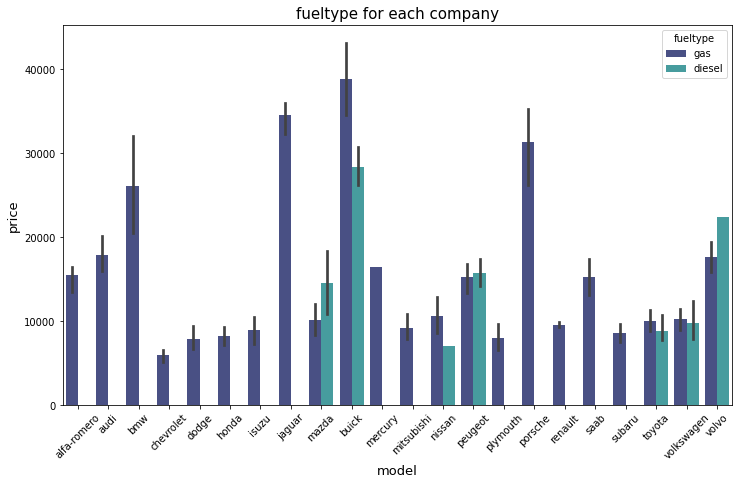

In [33]:
plt.figure(figsize=(12,7))
sns.barplot(x="company",y="price",data=df[0:10000],hue="fueltype",palette="mako")
plt.title("fueltype for each company",size=15)
plt.xlabel("model",size=13)
plt.ylabel("price" , size=13)
plt.xticks(rotation=45)
plt.show()

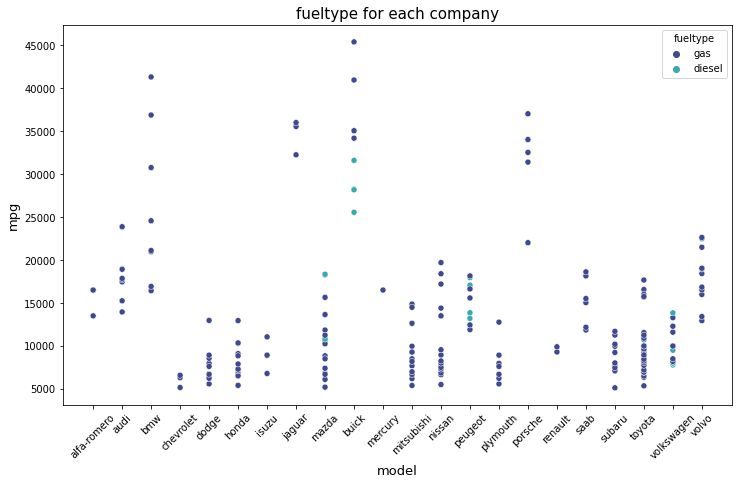

In [34]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="company",y="price",data=df[0:10000],hue="fueltype",palette="mako")
plt.title("fueltype for each company",size=15)
plt.xlabel("model",size=13)
plt.ylabel("mpg" , size=13)
plt.xticks(rotation=45)
plt.show()

In [35]:
comvsfuel = pd.DataFrame(df.groupby(['company',"fueltype"])['price'].mean().sort_values(ascending = False))
comvsfuel.reset_index()

,company,fueltype,price
0,buick,gas,38900.000000
1,jaguar,gas,34600.000000
2,porsche,gas,31400.500000
3,buick,diesel,28394.000000
4,bmw,gas,26118.750000
5,volvo,diesel,22470.000000
6,audi,gas,17859.166714
7,volvo,gas,17622.500000
8,mercury,gas,16503.000000
9,peugeot,diesel,15797.000000



## **Summaries :**

### **There is a difference in price when using a certain type of fuel for each company**

### **check the average price for each company**

In [36]:
comvsprices = pd.DataFrame(df.groupby(['company'])['price'].mean().sort_values(ascending = False))
comvsprices.reset_index()

,company,price
0,jaguar,34600.000000
1,buick,33647.000000
2,porsche,31400.500000
3,bmw,26118.750000
4,volvo,18063.181818
5,audi,17859.166714
6,mercury,16503.000000
7,alfa-romero,15498.333333
8,peugeot,15489.090909
9,saab,15223.333333


<Figure size 1440x432 with 0 Axes>

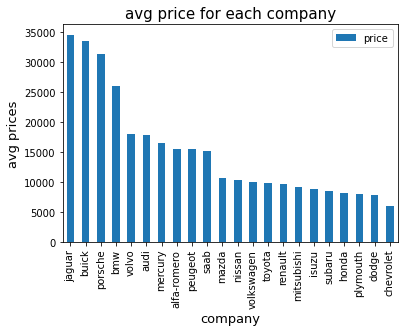

In [37]:

plt.figure(figsize=(20, 6))
comvsprices.plot.bar()
plt.title("avg price for each company",size=15)
plt.xlabel("company",size=13)
plt.ylabel("avg prices" , size=13)
plt.show()

## **Summaries :**

### **the most expensive car is jaguar**

### **Distribution of price on market**

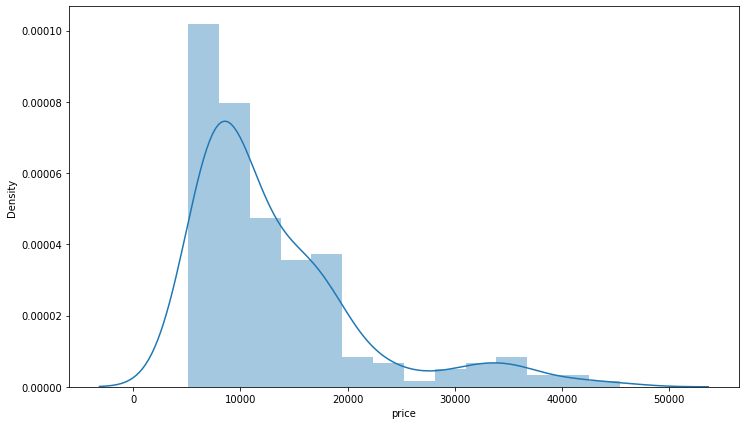

In [38]:
plt.figure(figsize=(12,7))
sns.distplot(df['price'],kde=True)
plt.show()

### **Distribution of price of gas vehicle**

Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

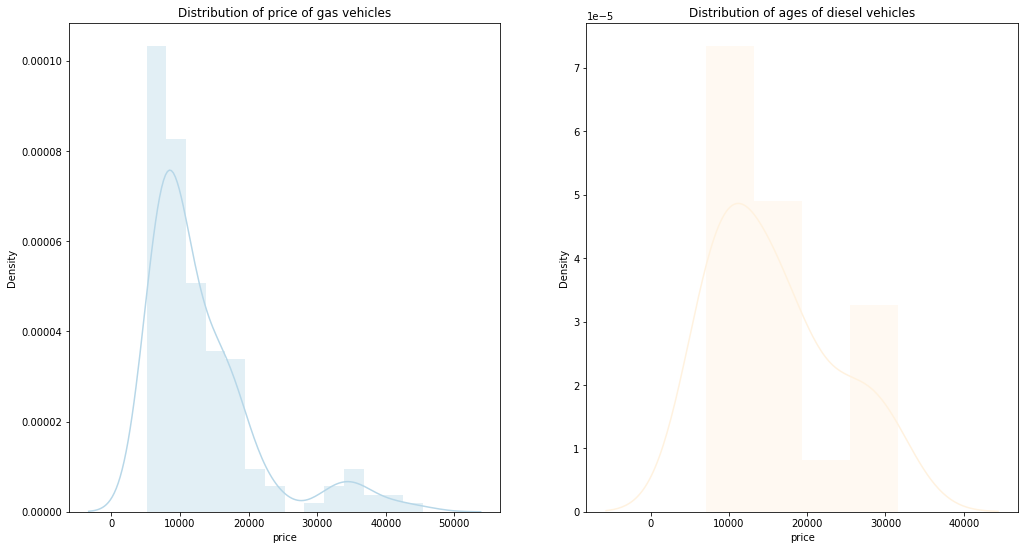

In [39]:
f= plt.figure(figsize=(17,9))

ax=f.add_subplot(121)
sns.distplot(df[(df.fueltype== 'gas')]["price"],color="#b7d7e8",ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(df[(df.fueltype == 'diesel')]['price'],color="#fff2df",ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

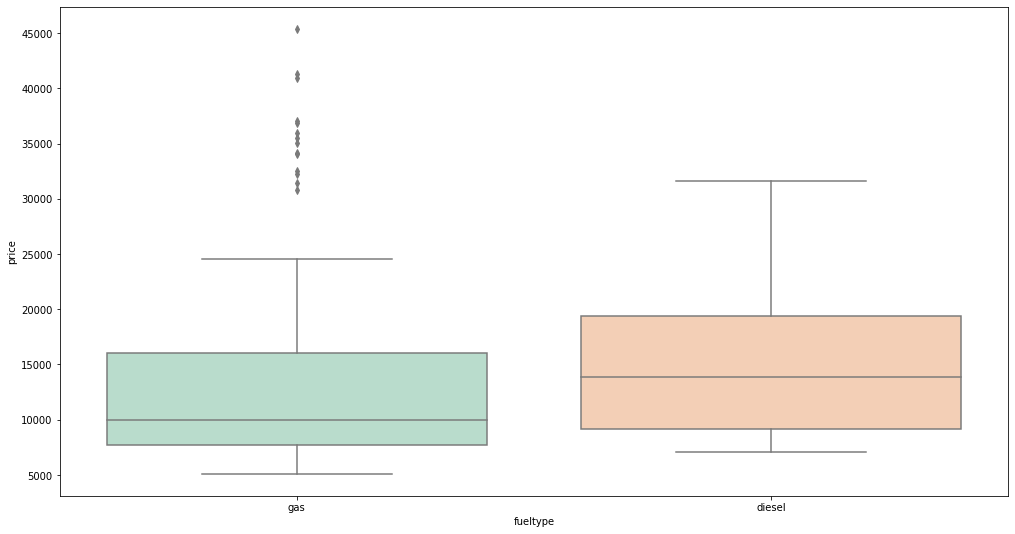

In [40]:
plt.figure(figsize=(17,9))
sns.boxplot(x = 'fueltype', y = 'price', data = df,palette='Pastel2')
plt.show()

### **Price distribution of Turbo aspiration vehicles**

Text(0.5, 1.0, 'Price distribution of Std aspiration vehicles')

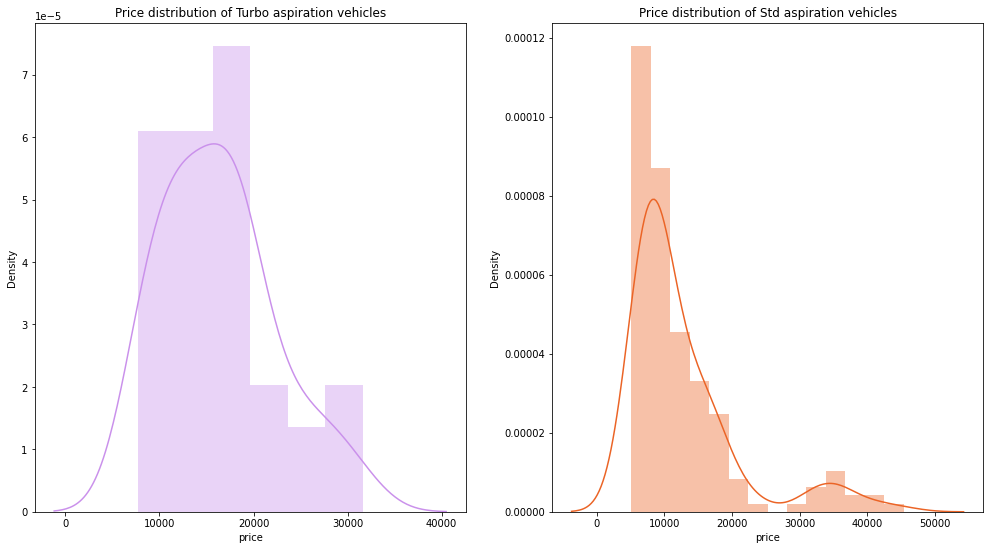

In [41]:
f= plt.figure(figsize=(17,9))

ax=f.add_subplot(121)
plot=sns.distplot(df[(df.aspiration== 'turbo')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of Turbo aspiration vehicles')

ax=f.add_subplot(122)
plot=sns.distplot(df[(df.aspiration == 'std')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of Std aspiration vehicles')

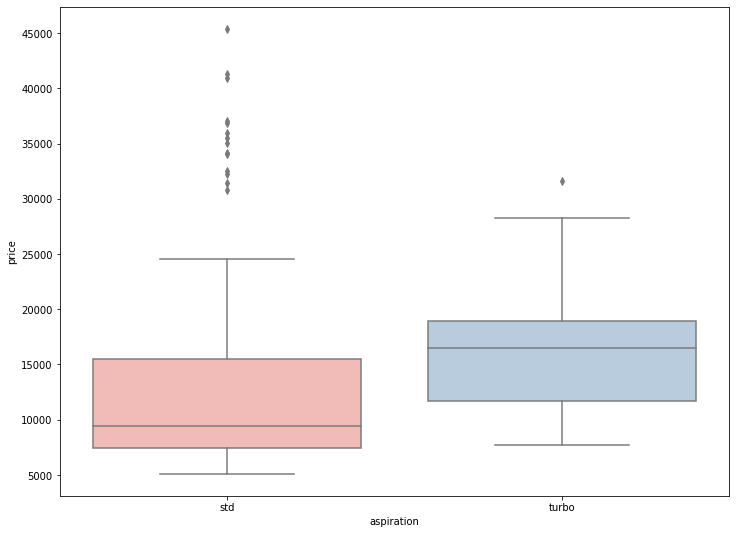

In [42]:
plt.figure(figsize=(12,9))
sns.boxplot(x = 'aspiration', y = 'price', data = df,palette='Pastel1')
plt.show()

### **Price distribution according to door number**

Text(0.5, 1.0, 'Price distribution of cars having four doors')

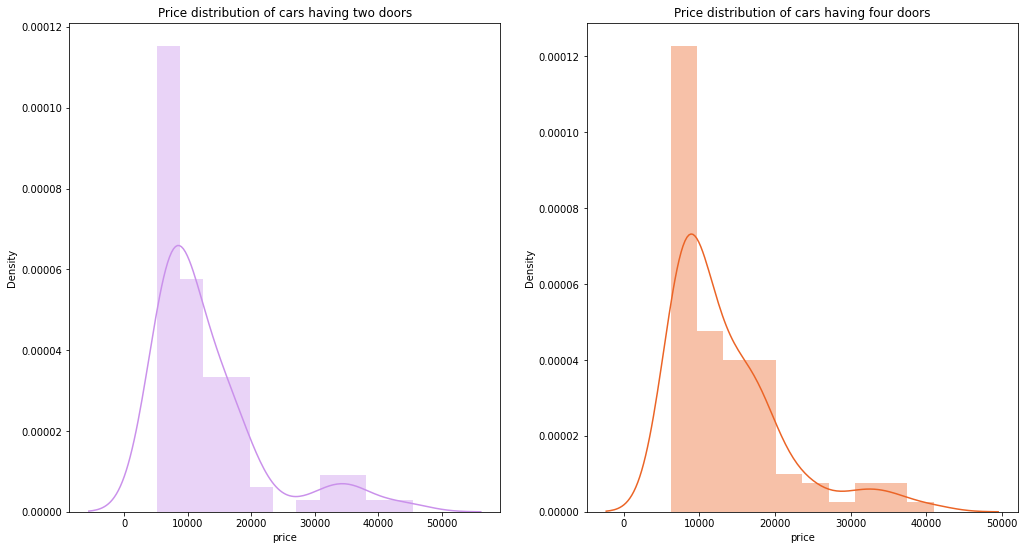

In [43]:
f= plt.figure(figsize=(17,9))

ax=f.add_subplot(121)
plot=sns.distplot(df[(df.doornumber== 'two')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of cars having two doors')

ax=f.add_subplot(122)
plot=sns.distplot(df[(df.doornumber == 'four')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of cars having four doors')

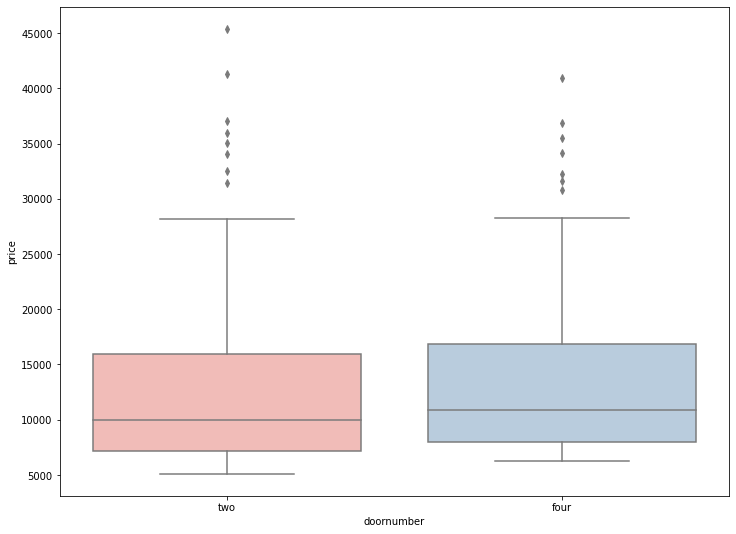

In [44]:
plt.figure(figsize=(12,9))
sns.boxplot(x = 'doornumber', y = 'price', data = df,palette='Pastel1')
plt.show()

In [45]:
pie=df['carbody'].value_counts().reset_index()
pie.columns=['carbody',"count"]
pie.T

,0,1,2,3,4
carbody,sedan,hatchback,wagon,hardtop,convertible
count,96,70,25,8,6


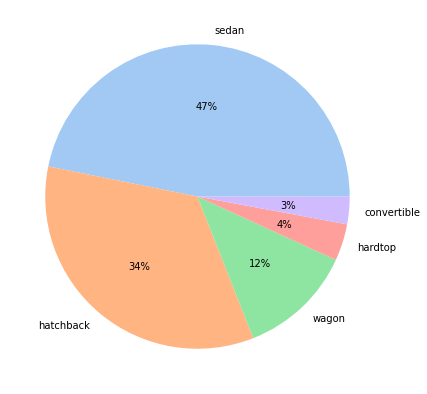

In [46]:
plt.figure(figsize=(12,7))
color=sns.color_palette("pastel")
plt.pie(pie["count"],colors=color,autopct='%.0f%%',labels=pie['carbody'])
plt.show()

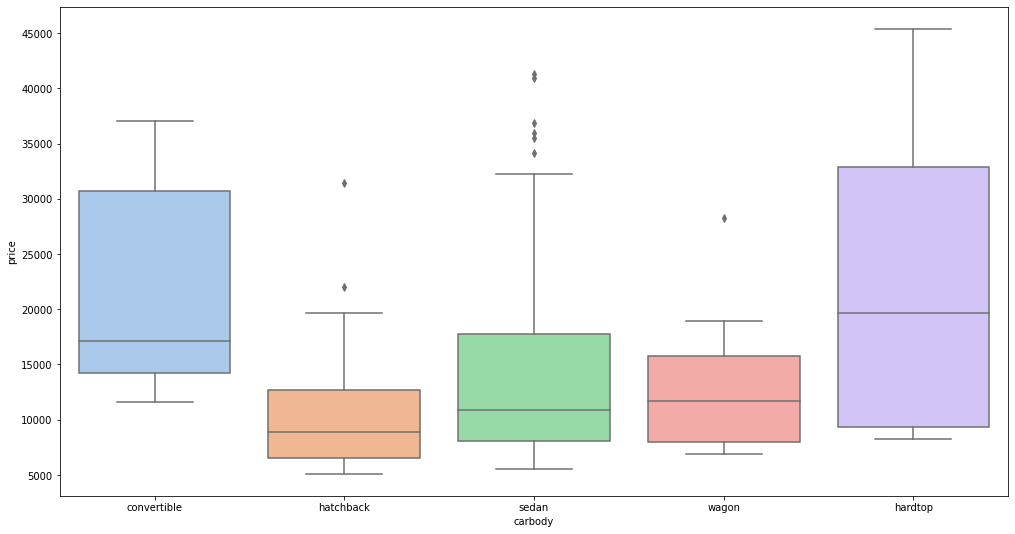

In [47]:
plt.figure(figsize=(17,9))
sns.boxplot(x = 'carbody', y = 'price', data = df,palette="pastel")
plt.show()

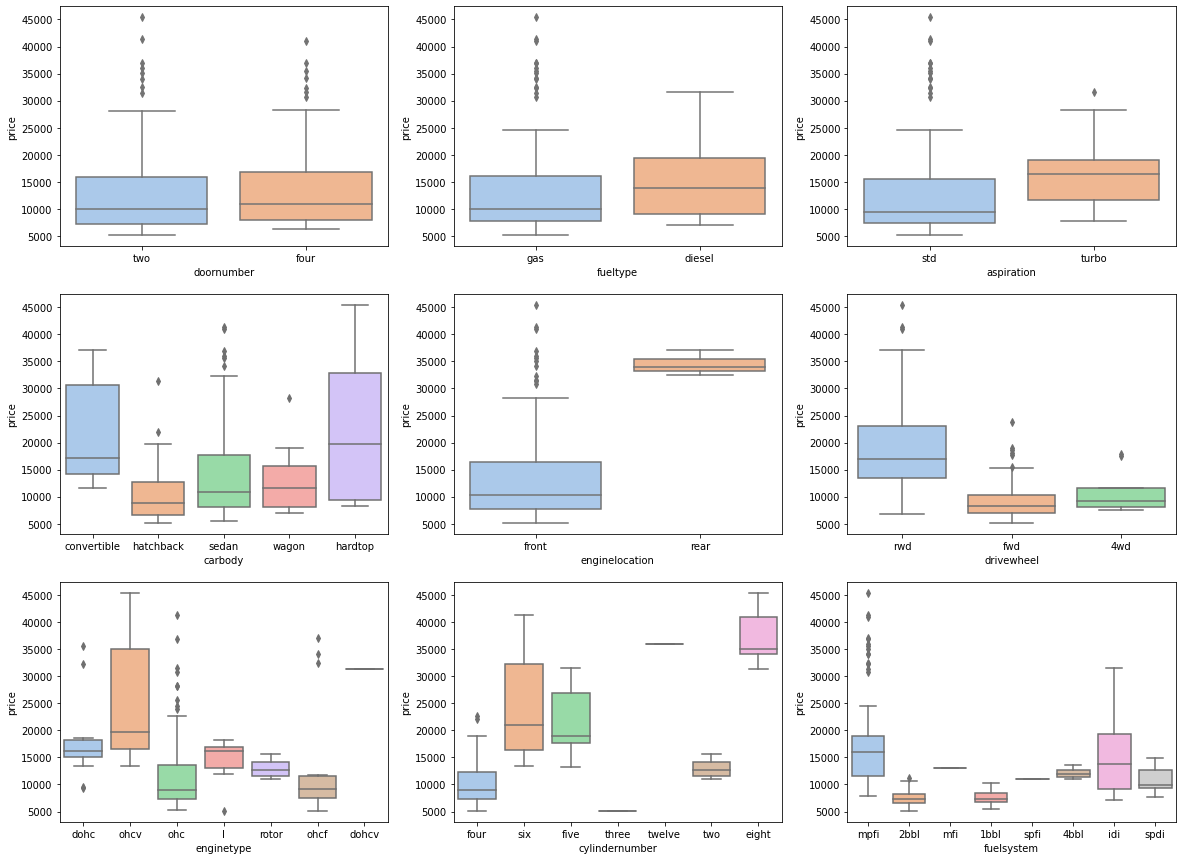

In [48]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price',palette="pastel", data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', palette="pastel",data =  df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price',palette="pastel", data =  df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', palette="pastel",data =  df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', palette="pastel",data =  df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price',palette="pastel", data =  df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price',palette="pastel", data =  df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', palette="pastel",data =  df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price',palette="pastel", data =  df)
plt.show()


In [49]:
df.columns

Index(['company', 'model', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'horsepower', 'price'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor ,GradientBoostingRegressor 
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from xgboost import XGBRegressor

In [51]:
X=df.drop("price", axis=1)
y=df["price"]

In [52]:
#Encoding the categorical columns into numerical columns 
cat_col=[col for col in X if X[col].dtype=="object" ] #get the cat col
X=pd.get_dummies(X,columns=cat_col,drop_first=True) #using pandas function

#scaling all the columns 
sc=StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X)

In [53]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [54]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (164, 196)
X_test shape:  (41, 196)
Y_train shape:  (164,)
Y_test shape:  (41,)


In [55]:
#evaluate and disply the performance of models
def evaluate(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test) 
    
   
    
    #printing the model name and accuracy !!!!!
    print("Model name: ",model)
    print("Model score : "+str(model.score(X_test, y_test) * 100))
    print("R2 score : ",r2_score(y_test,y_pred))
    print("MSE : ",mean_squared_error(y_test,y_pred))
    print("MAE : ",mean_absolute_error(y_test,y_pred))
    print("-------------------------------------------------------------")

In [56]:
#Initialize the models 
lr=LinearRegression() #Linear regressor
lasso=LassoCV() #Lasso regression
R=RidgeCV() #Ridge regression
knn=KNeighborsRegressor() 
svr=SVR() # support vector regressor
dtr=DecisionTreeRegressor()

models=[lr,lasso,R,knn,svr,dtr] #create a list of models 

for model in models:
    evaluate(model)
    


Model name:  LinearRegression()
Model score : -3.559341967815318e+27
R2 score :  -3.5593419678153175e+25
MSE :  2.809887666250543e+33
MAE :  2.8438735256258296e+16
-------------------------------------------------------------
Model name:  LassoCV()
Model score : 88.60426860013972
R2 score :  0.8860426860013972
MSE :  8996248.5756954
MAE :  1833.5988380386002
-------------------------------------------------------------
Model name:  RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
Model score : 83.15574340996118
R2 score :  0.8315574340996117
MSE :  13297533.439463371
MAE :  2154.842788724075
-------------------------------------------------------------
Model name:  KNeighborsRegressor()
Model score : 11.338293028488488
R2 score :  0.11338293028488489
MSE :  69993116.46385095
MAE :  4366.928463414633
-------------------------------------------------------------
Model name:  SVR()
Model score : -10.214083045873657
R2 score :  -0.10214083045873656
MSE :  87007428.73205775
MAE :  5707.45380638357

In [57]:
# lets apply our Ensamble models on this data
rf=RandomForestRegressor(n_estimators=200,random_state=42)
ada=AdaBoostRegressor(random_state=42)
gbr=GradientBoostingRegressor(random_state=42)
xgb=XGBRegressor()

modls=[rf,ada,gbr,xgb] #list of ensamble models 
for model in modls:
    evaluate(model)
    


Model name:  RandomForestRegressor(n_estimators=200, random_state=42)
Model score : 94.48041476255838
R2 score :  0.9448041476255838
MSE :  4357382.522316413
MAE :  1446.3518734030197
-------------------------------------------------------------
Model name:  AdaBoostRegressor(random_state=42)
Model score : 89.63006069578609
R2 score :  0.8963006069578608
MSE :  8186447.049526463
MAE :  2204.311981688892
-------------------------------------------------------------
Model name:  GradientBoostingRegressor(random_state=42)
Model score : 90.62775610890145
R2 score :  0.9062775610890145
MSE :  7398826.174281279
MAE :  1823.9204132048603
-------------------------------------------------------------
Model name:  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
      